In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sales_data.csv')
data.head()  

,Date,Product,Quantity,Price,Total_Sales
0,2023-04-13,Product C,12,45.991469,551.897623
1,2023-12-15,Product A,2,97.905271,195.810543
2,2023-09-28,Product D,13,84.085661,1093.113598
3,2023-04-17,Product A,8,57.023294,456.186349
4,2023-03-13,Product E,2,21.090039,42.180078


In [3]:

print("Missing Values:\n", data.isnull().sum())

data.dropna(inplace=True)

data['Date'] = pd.to_datetime(data['Date'])

data.info()

Missing Values:
 Date           0
Product        0
Quantity       0
Price          0
Total_Sales    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1000 non-null   datetime64[ns]
 1   Product      1000 non-null   object        
 2   Quantity     1000 non-null   int64         
 3   Price        1000 non-null   float64       
 4   Total_Sales  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 39.2+ KB


In [4]:

total_sales_over_time = data.groupby('Date')['Total_Sales'].sum().reset_index()

best_selling_products = data.groupby('Product')['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by='Quantity', ascending=False)

data['Month'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total_Sales'].sum().reset_index()

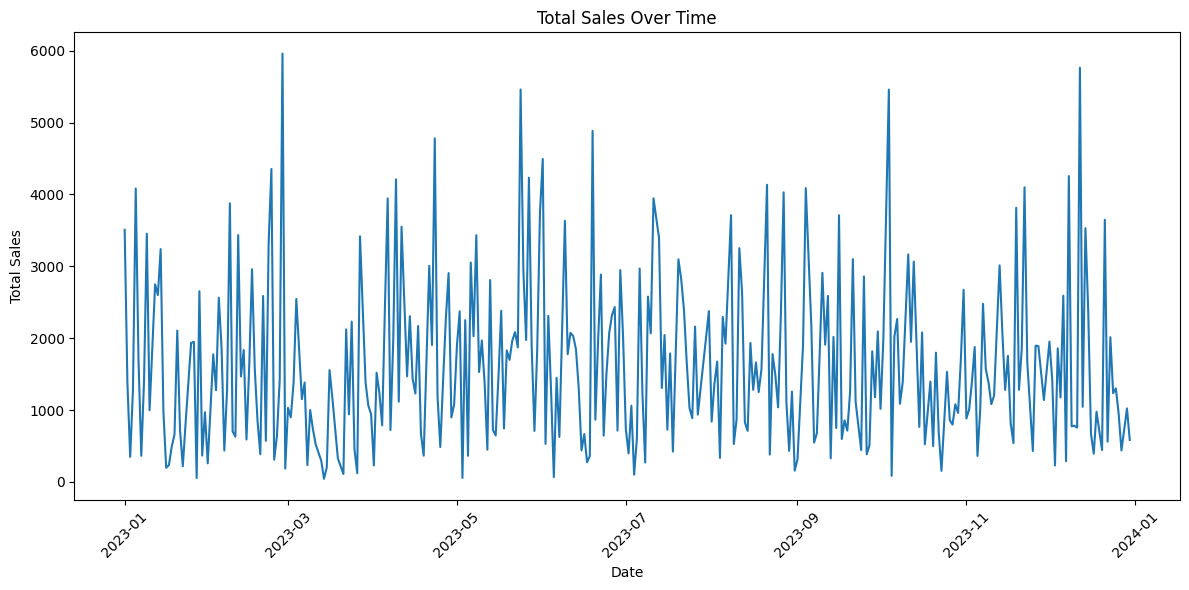

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total_Sales', data=total_sales_over_time)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
best_selling_products.to_csv('best_selling_products.csv', index=False)
monthly_sales.to_csv('monthly_sales.csv', index=False)

print("Analysis results saved.")

Analysis results saved.


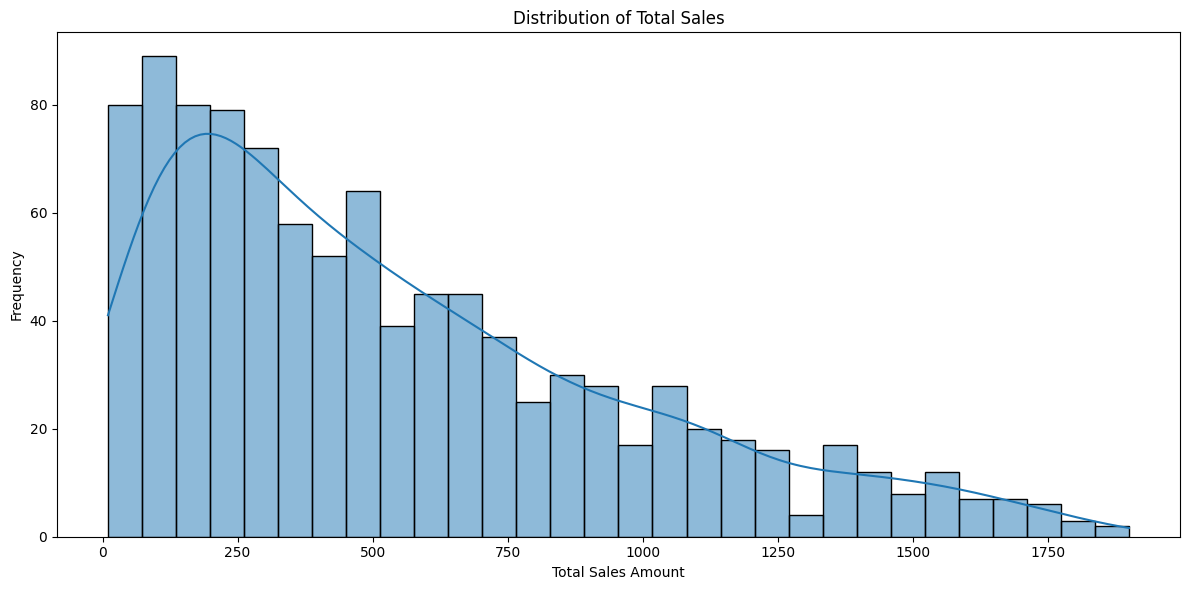

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Total_Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

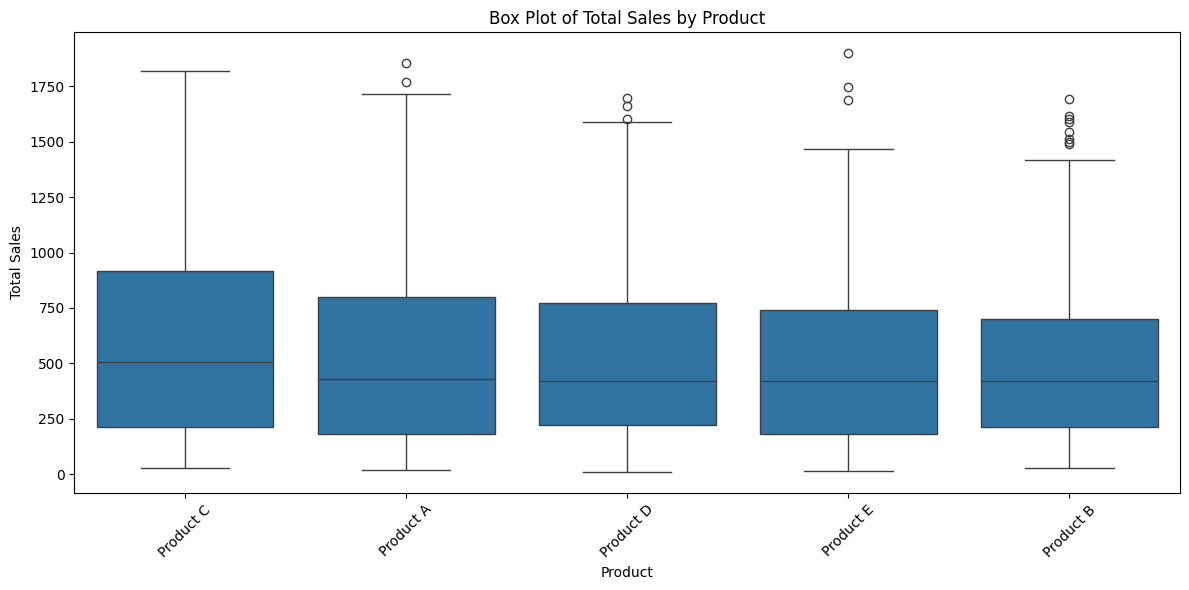

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product', y='Total_Sales', data=data)
plt.title('Box Plot of Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

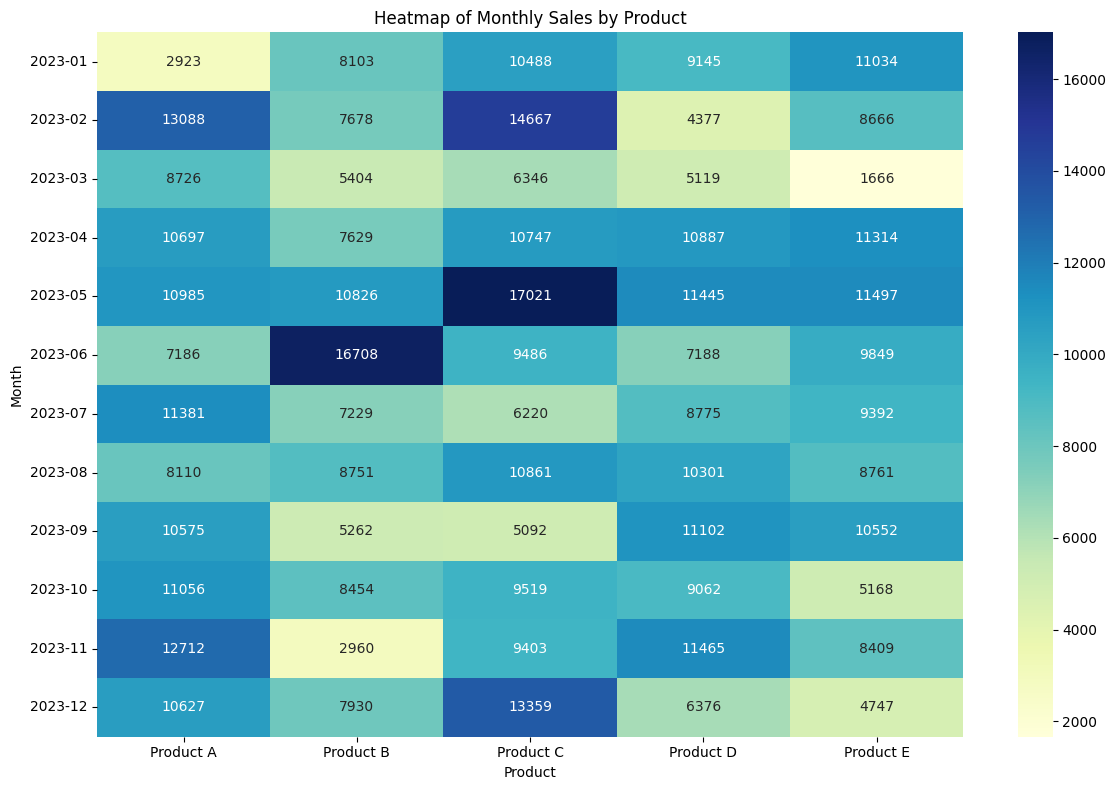

In [9]:
# Create a pivot table for heatmap
heatmap_data = data.pivot_table(values='Total_Sales', index='Month', columns='Product', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Monthly Sales by Product')
plt.xlabel('Product')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

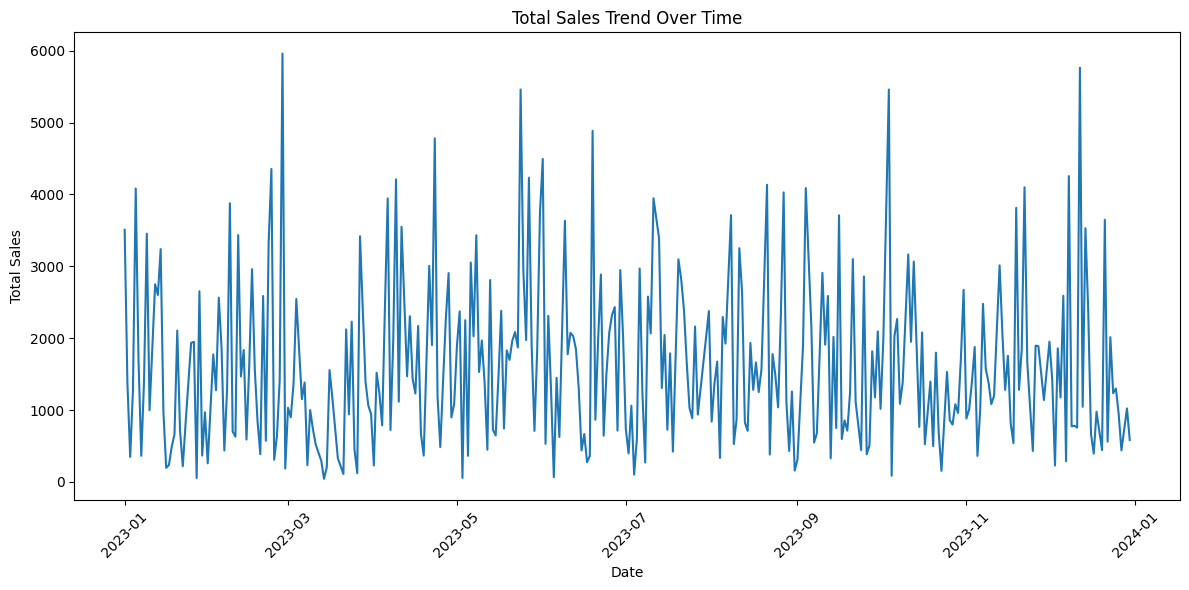

In [10]:
# Plotting total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total_Sales', data=total_sales_over_time)
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

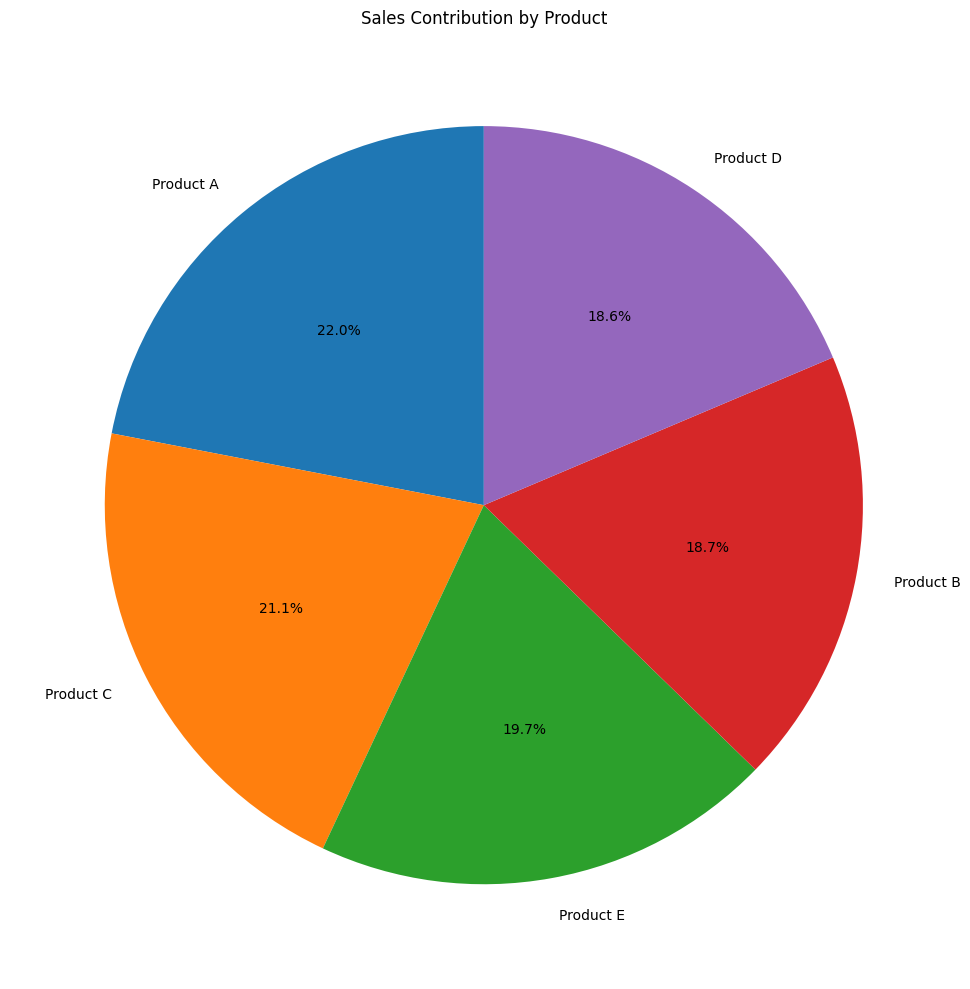

In [11]:
# Pie chart for sales contribution by product
product_sales = best_selling_products.set_index('Product')['Quantity']

plt.figure(figsize=(10, 10))
product_sales.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sales Contribution by Product')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.tight_layout()
plt.show()